In [1]:
import os
os.environ['WANDB_API_KEY'] = 'd34f864932245bbdf3a9396a1ebde883ad2068f3'

import wandb
api = wandb.Api()

In [2]:
runA = api.run("xieshufang76/scigpt/7303740093.78640-bd9d41a1-7ddc-4449-a2d7-1e7155d7fb47")
runA_loss = runA.history(keys=['train_inner/loss'])

print(runA_loss[:79])


    _step  train_inner/loss
0     101          8.279609
1     201          8.042969
2     301          7.101367
3     401          6.991562
4     501          6.427812
..    ...               ...
74   7501          2.195078
75   7601          2.204219
76   7701          2.158750
77   7801          2.202031
78   7901          2.190937

[79 rows x 2 columns]


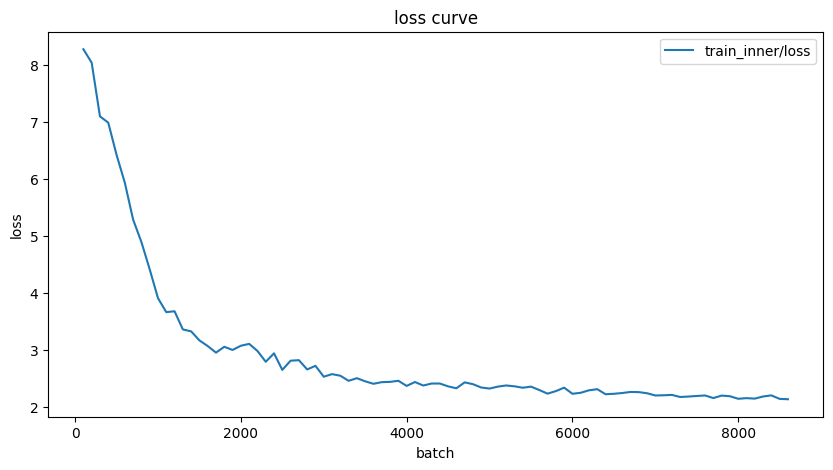

In [3]:
# draw loss curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(runA_loss['_step']-1, runA_loss['train_inner/loss'], label='train_inner/loss')
plt.legend()
plt.xlabel('batch')
plt.ylabel('loss')
plt.title('loss curve')
plt.show()


In [4]:
runB_1 = api.run("xieshufang76/scigpt/7303336317.12936-f9e18103-e70d-42c8-b7c7-fadb3a2a9fd8")
runB_1_loss = runB_1.history(keys=['train_inner/loss'])
print(runB_1_loss)

         _step  train_inner/loss
0      40961.0          2.129688
1      81921.0          2.113281
2     122881.0          2.077344
3     163841.0          2.028906
4     204801.0          2.001562
..         ...               ...
208  8560641.0          1.617578
209  8601601.0          1.616406
210  8642561.0          1.610156
211  8683521.0          1.614453
212  8724481.0          1.610547

[213 rows x 2 columns]


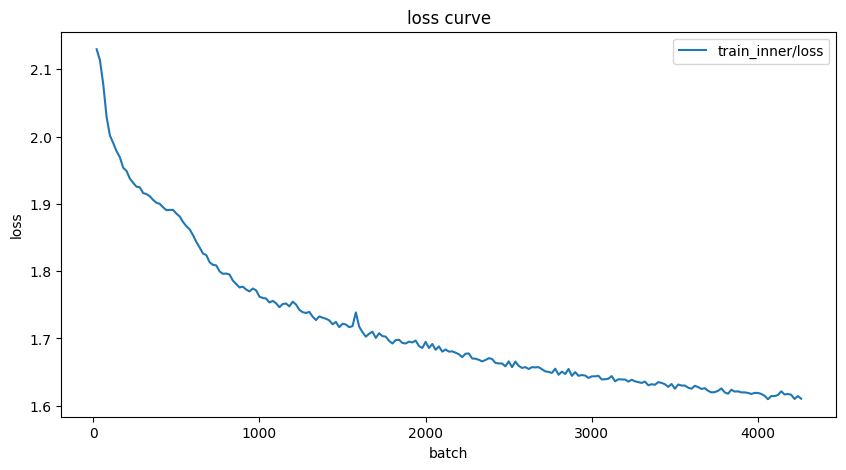

In [5]:
plt.figure(figsize=(10, 5))
plt.plot((runB_1_loss['_step'] - 1)/2048, runB_1_loss['train_inner/loss'], label='train_inner/loss')
plt.legend()
plt.xlabel('batch')
plt.ylabel('loss')
plt.title('loss curve')
plt.show()

In [6]:
runB_2 = api.run("xieshufang76/scigpt/7302291987.70859-df95aebf-3d1c-4040-85a8-676de085e841")
runB_2_loss = runB_2.history(keys=['train_inner/loss'])
print(runB_2_loss)

        _step  train_inner/loss
0     9420801          1.531250
1     9461761          1.532422
2     9502721          1.533203
3     9543681          1.526563
4     9584641          1.525391
..        ...               ...
396  25640961          1.522656
397  25681921          1.515625
398  25722881          1.520703
399  25763841          1.516016
400  25804801          1.519141

[401 rows x 2 columns]


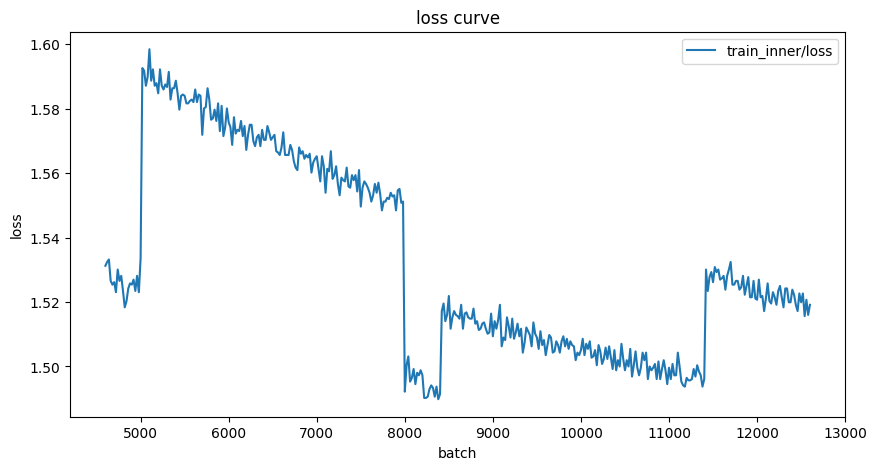

In [7]:
plt.figure(figsize=(10, 5))
plt.plot((runB_2_loss['_step'] - 1)/2048, runB_2_loss['train_inner/loss'], label='train_inner/loss')
plt.legend()
plt.xlabel('batch')
plt.ylabel('loss')
plt.title('loss curve')
plt.show()

In [9]:
import numpy as np

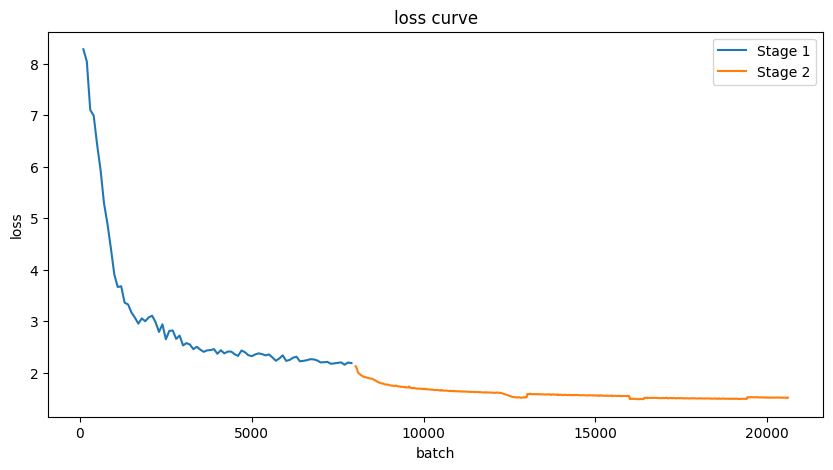

In [10]:
# put everything together

plt.figure(figsize=(10, 5))

plt.plot(runA_loss[:79]['_step']-1, runA_loss[:79]['train_inner/loss'], label='Stage 1')

# concat runB_1 and runB_2
x = np.concatenate([runB_1_loss['_step']-1, runB_2_loss['_step']-1]) / 2048 + 8000
y = np.concatenate([runB_1_loss['train_inner/loss'], runB_2_loss['train_inner/loss']])
plt.plot(x, y, label='Stage 2')

plt.legend()
plt.xlabel('batch')
plt.ylabel('loss')
plt.title('loss curve')
plt.show()


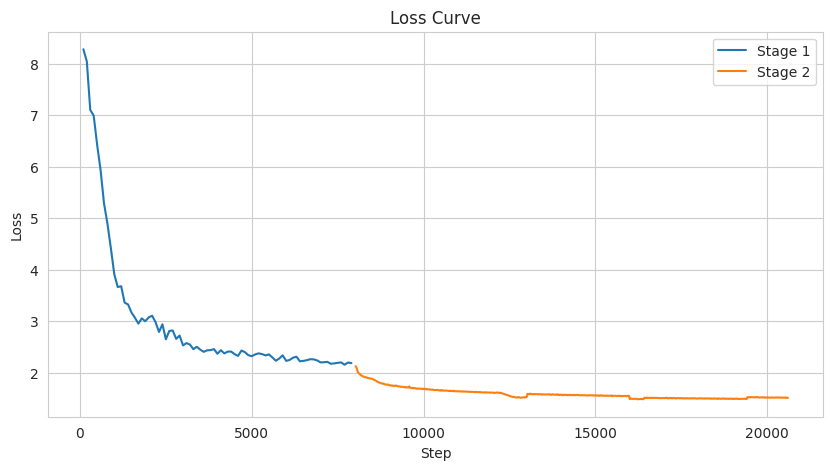

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure style
sns.set_style("whitegrid")

plt.figure(figsize=(10, 5))

# Use a solid line style for the first plot and a dashed line style for the second plot
plt.plot(runA_loss[:79]['_step']-1, runA_loss[:79]['train_inner/loss'], label='Stage 1', linestyle='-')

# concat runB_1 and runB_2
x = np.concatenate([runB_1_loss['_step']-1, runB_2_loss['_step']-1]) / 2048 + 8000
y = np.concatenate([runB_1_loss['train_inner/loss'], runB_2_loss['train_inner/loss']])
plt.plot(x, y, label='Stage 2', linestyle='-')

plt.legend()
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Loss Curve')

# Show grid
plt.grid(True)

plt.show()

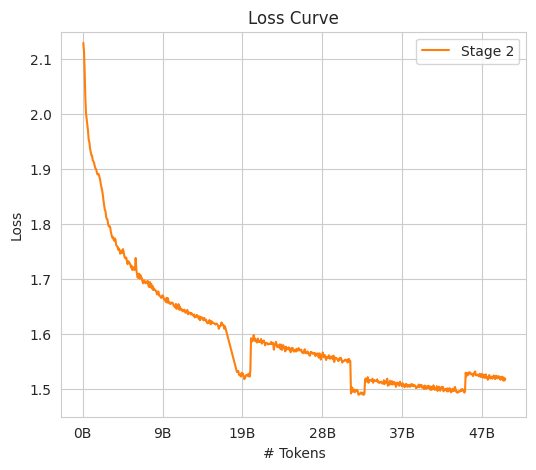

In [36]:
import matplotlib.ticker as ticker
# Set the figure style
sns.set_style("whitegrid")

plt.figure(figsize=(6, 5))

# Use a solid line style for the first plot and a dashed line style for the second plot
plt.plot(runA_loss[:79]['_step']-1, runA_loss[:79]['train_inner/loss'], label='', linestyle='-')

# concat runB_1 and runB_2
x = np.concatenate([runB_1_loss['_step']-1, runB_2_loss['_step']-1]) / 2048 * (4*2**20) + 8000*2048
y = np.concatenate([runB_1_loss['train_inner/loss'], runB_2_loss['train_inner/loss']])
plt.plot(x, y, label='Stage 2', linestyle='-')

plt.legend()
plt.xlabel('# Tokens')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.ylim(1.45, 2.15)

# Show grid
plt.grid(True)

# Define a function to format the x-ticks
def billions(x, pos):
    return '%1.0fB' % (x / (2**30) )

# Use the FuncFormatter class to format the x-ticks
formatter = ticker.FuncFormatter(billions)
plt.gca().xaxis.set_major_formatter(formatter)


plt.show()